In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray

### (a)

In [293]:
from PIL import Image
starry_starry_night = Image.open("starry_starry_night.png") 
array_starry_starry_night = np.array(starry_starry_night)
array_starry_starry_night = array_starry_starry_night[...,:3]

In [297]:
starry_starry_night_reshaped = array_starry_starry_night.reshape(array_starry_starry_night.shape[0]*
                                                                 array_starry_starry_night.shape[1],3)

In [298]:
starry_starry_night_reshaped

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       ...,
       [121, 134, 134],
       [121, 128, 134],
       [121, 128, 134]], dtype=uint8)

In [299]:
starry_starry_night_reshaped.shape

(394663, 3)

### (b)

In [ ]:
# kmax can be considered as the number of data points, which is 394663 observations with 3 dimensions for RGB in this case

### (c) 

In [104]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [300]:
X = starry_starry_night_reshaped

In [233]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

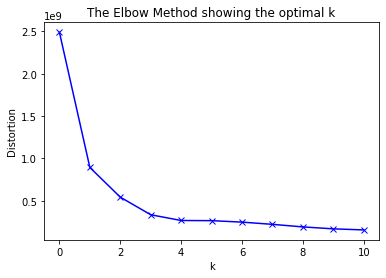

In [236]:
elbow = calculate_WSS(X,11)
plt.plot(elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### (d) 

In [578]:
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

In [579]:
color_labels = pd.DataFrame(kmeans.labels_)
replacement  = centroids[color_labels[0]]

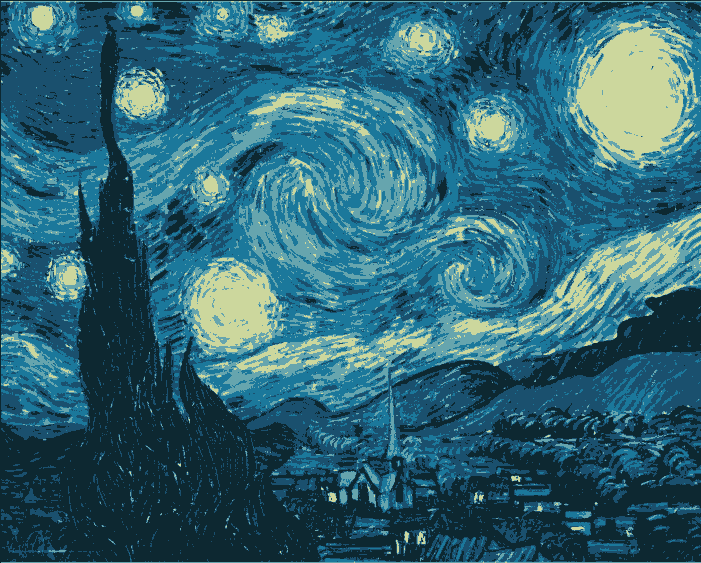

In [580]:
array_starry_starry_night_compressed6 = replacement.reshape(array_starry_starry_night.shape[0],
                                                                 array_starry_starry_night.shape[1],3)
img = Image.fromarray(np.uint8(array_starry_starry_night_compressed6), 'RGB')
img

In [ ]:
# the image looks good when k is 5

### (e)

In [562]:
np.unique(X,axis=0).shape

(259412, 3)

In [565]:
np.unique(replacement,axis=0).shape

(5, 3)

In [ ]:
# the original pixels have  been replaced with the cluster centers they are in,
# which now have only 5 centers and thus 5 unique combinations for the RGB in this case
# in contrast, before compression, there were 259412 unique combinations of RGB arrays

In [ ]:
# the value of K can be approximately chosen based on bare human eyes since the picture is
# relatively simple in its color or it can be obtained via the Elbow method with the length
# and width of the picture as the upper bound

### (f)

In [422]:
from PIL import Image
from sklearn.feature_extraction import image

In [504]:
farewell_to_anger = Image.open("farewell_to_anger.png") 
array_farewell_to_anger = np.array(farewell_to_anger)
array_farewell_to_anger = array_farewell_to_anger[...,:3]

farewell_to_anger_patches = image.extract_patches_2d(array_farewell_to_anger, (2, 2))

In [515]:
farewell_to_anger_patches_12D = farewell_to_anger_patches.reshape(226188, 12)

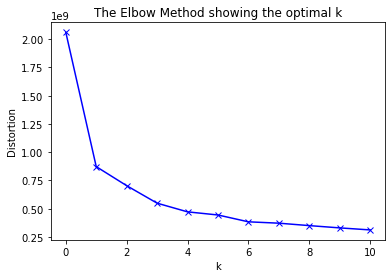

In [429]:
elbow = calculate_WSS(farewell_to_anger_patches_12D,11)
plt.plot(elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [536]:
kmeans = KMeans(n_clusters = 6).fit(farewell_to_anger_patches_12D)
centroids = kmeans.cluster_centers_

In [537]:
color_labels = pd.DataFrame(kmeans.labels_)
replacement  = centroids[color_labels[0]]

In [538]:
replacement_reshape_back = replacement.reshape(226188, 2, 2, 3)

In [539]:
reconstructed  = image.reconstruct_from_patches_2d(replacement_reshape_back, array_farewell_to_anger.shape)

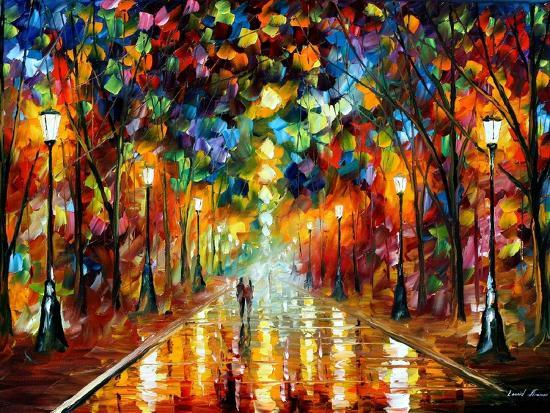

In [540]:
img = Image.fromarray(np.uint8(array_farewell_to_anger), 'RGB')
img

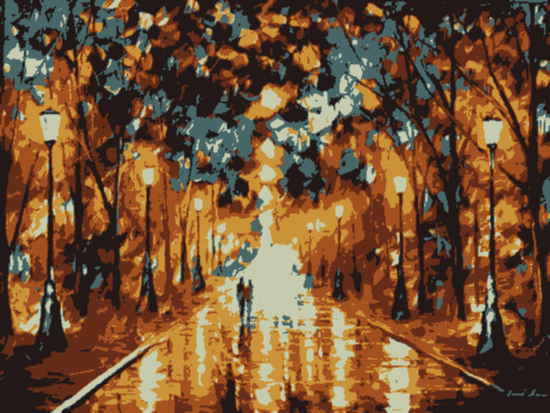

In [541]:
img = Image.fromarray(np.uint8(reconstructed), 'RGB')
img